<a href="https://colab.research.google.com/github/lambdabypi/AppliedGenAIIE5374/blob/main/M4_Lab1_GenAI_Triage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; margin-bottom: 20px; text-align: center; border-radius: 10px;">
<h1 style="font-size: 32px; margin-bottom: 10px;">GenAI-Assisted Medical Triage System</h1>
<p style="margin: 0; font-size: 16px;">Enhancing clinical decision support with artificial intelligence</p>
<p style="margin-top: 10px; font-size: 18px; font-weight: bold;">Dr. Dehghani</p>
</div>

<div style="background: #f0f5ff; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">Overview</h2>

<p style="line-height: 1.8; font-size: 16px;">This notebook demonstrates a GenAI-assisted medical triage system with two key components:</p>

<div style="display: flex; flex-wrap: wrap; gap: 15px; margin-top: 15px;">
    <div style="display: flex; align-items: center; background-color: white; padding: 10px 15px; border-radius: 8px; border-left: 3px solid #0055d4;"><span style="font-size: 24px; margin-right: 10px;">👤</span> <span><strong>Patient Generation</strong>: Using Gemini to create synthetic patient profiles</span></div>
    <div style="display: flex; align-items: center; background-color: white; padding: 10px 15px; border-radius: 8px; border-left: 3px solid #0055d4;"><span style="font-size: 24px; margin-right: 10px;">🏥</span> <span><strong>Triage Decision-Making</strong>: Using ChatGPT to evaluate and assign triage levels</span></div>
</div>

<p style="margin-top: 20px; font-style: italic; color: #0055d4;">The system generates patient information, processes it through a triage model, and provides clinical rationale for each decision.</p>

<hr style="margin: 20px 0; border: 0; border-top: 1px solid #ddd;">

<p style="font-size: 14px; color: #666;"><strong style="color: #f39c12;">Note:</strong> This demonstration is for educational purposes only and requires significant modifications for real-world clinical applications.</p>
</div>

<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #e0e0e0;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">Learning Objectives</h2>

<ul style="line-height: 1.8; font-size: 16px;">
<li>Demonstrating the use of GenAI for medical applications</li>
<li>Implementing prompt engineering techniques in healthcare contexts</li>
<li>Integrating multiple AI models (Gemini and ChatGPT) in LangChain</li>
<li>Understanding AI-assisted clinical decision support systems</li>
</ul>
</div>


<div style="margin-bottom: 25px; padding-left: 15px; border-left: 4px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #e0e0e0;">Imports and Setup</h2>

<p style="line-height: 1.6; font-size: 16px; color: #666;">Import necessary libraries and configure API access for Gemini and OpenAI models.</p>
</div>

In [1]:
# 📦 Importing Libraries
import os # Operating system interactions (basic)
import json # Working with JSON data (basic)
import time # Time-related functions (basic)
import random # Generating random numbers (basic)
import pandas as pd # Data manipulation and analysis (major)
import matplotlib.pyplot as plt # Plotting and visualization (major)
import seaborn as sns # Enhanced data visualization (major)
from datetime import datetime # Date and time operations (basic)
from google.colab import userdata # Secure access to Colab user data (Colab specific)
import google.generativeai as genai # Interacting with Google's GenAI models (major)
import openai # Interacting with OpenAI models (major)
from IPython.display import display, Markdown, HTML # Displaying rich output in notebooks (notebook specific)
from tqdm import tqdm
import numpy as np

# Set visual styles
plt.style.use('ggplot')
sns.set(style="whitegrid")

print("Libraries imported successfully.")

Libraries imported successfully.


<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 20px;">API Keys Setup</h3>
<p>Configure your API keys for Gemini and OpenAI models. For security, use Colab Secrets whenever possible.</p>
</div>

In [2]:
# 🔑 Get API keys from Colab Secrets
# You need to set these up in your Colab environment under "Secrets"

# Uncomment these lines when running in Colab
openai.api_key = userdata.get('OPENAI_API_KEY')
genai.configure(api_key=userdata.get('GEMINI_API_KEY'))

# For demonstration purposes, you can set keys directly (not recommended for shared notebooks)
# openai.api_key = "your-openai-api-key"
# genai.configure(api_key="your-gemini-api-key")

print("API keys configured successfully.")
# Use API Key name shoud be OPENAI_API_KEY and GEMINI_API_KEY, otherwise please fix it manually on the code

API keys configured successfully.


<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">👨‍⚕️ Patient Generation Functions</h2>
<p style="line-height: 1.6;">These functions use the Gemini model to generate synthetic patient profiles with realistic medical details for emergency department triage simulation.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Key Functions:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>generate_patient()</strong>: Creates synthetic patient data using Gemini's generative AI, including demographics, symptoms, medical history, and vital signs</li>
        <li><strong>format_patient_data()</strong>: Transforms the generated JSON data into a readable format for display</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Triage Classification:</h3>
    <p>The system uses the Emergency Severity Index (ESI) with 5 levels:</p>
    <ol style="padding-left: 20px;">
        <li><span style="color: #ff0000;"><strong>Immediate (Red)</strong></span>: Life-threatening conditions requiring immediate attention</li>
        <li><span style="color: #ff9900;"><strong>Very Urgent (Orange)</strong></span>: Potentially life-threatening, requires rapid assessment</li>
        <li><span style="color: #ffcc00;"><strong>Urgent (Yellow)</strong></span>: Serious but stable condition requiring timely assessment</li>
        <li><span style="color: #00cc00;"><strong>Standard (Green)</strong></span>: Standard cases with no immediate danger</li>
        <li><span style="color: #0099ff;"><strong>Non-Urgent (Blue)</strong></span>: Minor conditions that can safely wait</li>
    </ol>
</div>
<div style="background-color: #fff9e6; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ffc107;">
    <h3 style="color: #996600; margin-top: 0;">Notes on Implementation:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Prompt Design:</strong> The prompt uses a Chain-of-Thought approach to guide the LLM through generating diverse and realistic patient profiles. It includes specific distribution instructions (e.g., 1 in 5 cases should be pediatric) to ensure variety.</li>
        <li><strong>Limitations:</strong> Despite careful prompt engineering, generated data may still exhibit bias and might not perfectly represent all age groups, genders, or medical conditions. Multiple rounds of iteration were needed to improve the prompt, but further enhancements are possible.</li>
        <li><strong>Error Handling:</strong> The code includes robust error handling to manage potential issues with LLM responses, including JSON parsing and formatting challenges.</li>
        <li><strong>Consistency Controls:</strong> The prompt includes instructions to ensure medical history, medications, and vital signs are internally consistent and appropriate for the patient's profile.</li>
        <li><strong>Response Cleaning:</strong> Special processing is needed to extract clean JSON from the LLM response, as models sometimes include markdown formatting or explanatory text.</li>
    </ul>
</div>
</div>

In [ ]:
# Define triage levels
TRIAGE_LEVELS = {
    1: "Immediate (Red): Life-threatening conditions requiring immediate attention",
    2: "Very Urgent (Orange): Potentially life-threatening, requires rapid assessment",
    3: "Urgent (Yellow): Serious but stable condition requiring timely assessment",
    4: "Standard (Green): Standard cases with no immediate danger",
    5: "Non-Urgent (Blue): Minor conditions that can safely wait"
}

def generate_patient(patient_id=None):
    if not patient_id:
        patient_id = f"PT-{datetime.now().strftime('%Y%m%d-%H%M')}-{random.randint(1000, 9999)}"

    prompt = f"""
    You are generating synthetic emergency room patients for a simulation.
    To maximize educational value, you must use a chain-of-thought reasoning strategy (internally, not in output) to ensure variety.

    **Chain-of-Thought Planning (do not include in output):**
    1. Randomly select an age group: infant/toddler (0–3), child (4–12), adolescent (13–18), young adult (19–39), adult (40–64), or elderly (65+). Avoid repeating the same age group in consecutive cases.
    2. Randomly select gender.
    3. Randomly select a chief complaint from a broad range: trauma, infection, psychiatric, allergy, pain, minor injury, medication issue, fever, seizure, behavioral, etc. Do not always choose chest pain or shortness of breath, and avoid repeating the same complaint in back-to-back cases. Make sure to include some mild cases as well.
    4. Out of every 5 cases: 1 should be pediatric, 2 should be under 40, 1 should be over 65, and 1 can be any age.
    5. Out of every 5 cases: only 1 should have a cardiac chief complaint (such as chest pain, myocardial infarction, or shortness of breath).
    6. Match medical history, medications, and allergies to the selected age, gender, and chief complaint. Vary these details between cases.
    7. Ensure the pain score and vital signs are consistent with the scenario, and allow for a wide range of values to show diversity.
    8. Occasionally include ambulance arrivals or accident/trauma cases among the generated patients.


    **OUTPUT REQUIREMENT:**
    ONLY return the JSON object below, nothing else.
    Populate all fields with realistic, non-repetitive, internally-consistent values, matching your planning above.

    {{
      "patient_id": "{patient_id}",
      "age": AGE,
      "sex": "GENDER",
      "chief_complaint": "PRIMARY_COMPLAINT",
      "symptoms": ["SYMPTOM1", "SYMPTOM2", ...],
      "medical_history": ["CONDITION1", "CONDITION2", ...],
      "medications": ["MEDICATION1", "MEDICATION2", ...],
      "allergies": ["ALLERGY1", "ALLERGY2", ...],
      "vitals": {{
        "temperature": TEMP_VALUE,
        "heart_rate": HR_VALUE,
        "blood_pressure": "BP_VALUE",
        "respiratory_rate": RR_VALUE,
        "oxygen_saturation": O2_VALUE
      }},
      "pain_score": PAIN_LEVEL
    }}
    """

    try:
        gemini_model = genai.GenerativeModel('models/gemini-2.0-flash')
        response = gemini_model.generate_content(prompt)
        response_text = response.text.strip()

        # Remove code block markers if present
        if response_text.startswith("```json"):
            response_text = response_text[7:]
        if response_text.startswith("```"):
            response_text = response_text[3:]
        if "```" in response_text:
            response_text = response_text.split("```")[0]

        # Find the first JSON object in the response
        json_start = response_text.find('{')
        json_end = response_text.find('}', json_start)  # Find the first closing }
        bracket_count = 0
        for i, c in enumerate(response_text[json_start:], start=json_start):
            if c == '{':
                bracket_count += 1
            elif c == '}':
                bracket_count -= 1
                if bracket_count == 0:
                    json_end = i + 1
                    break

        if json_start >= 0 and json_end > json_start:
            json_content = response_text[json_start:json_end]
            patient_data = json.loads(json_content)
            return patient_data
        else:
            raise ValueError("Could not extract valid JSON from Gemini response")

    except Exception as e:
        return f"❌ LLM did not respond properly: {e}"



# Function to convert patient data to a readable format
def format_patient_data(patient):
    """
    Formats patient data for display

    Args:
        patient: Dictionary containing patient information

    Returns:
        str: Formatted patient information
    """
    formatted = f"""
    ## Patient ID: {patient['patient_id']}

    **Demographics:** {patient['age']}-year-old {patient['sex']}
    **Chief Complaint:** {patient['chief_complaint']}

    **Symptoms:**
    - {', '.join(patient['symptoms'])}

    **Medical History:**
    - {', '.join(patient['medical_history'])}

    **Medications:**
    - {', '.join(patient['medications'])}

    **Allergies:**
    - {', '.join(patient['allergies'])}

    **Vitals:**
    - Temperature: {patient['vitals']['temperature']}°F
    - Heart Rate: {patient['vitals']['heart_rate']} bpm
    - Blood Pressure: {patient['vitals']['blood_pressure']}
    - Respiratory Rate: {patient['vitals']['respiratory_rate']} breaths/min
    - Oxygen Saturation: {patient['vitals']['oxygen_saturation']}%

    **Pain Score:** {patient['pain_score']}/10
    """
    return formatted

In [ ]:
# Generate 2 patients and display them
for i in range(1):
    print(f"\n{'='*50}\nGENERATING PATIENT #{i+1}\n{'='*50}")
    patient = generate_patient()

    # Check if we received an error message
    if isinstance(patient, str):
        print(patient)
    else:
        print(format_patient_data(patient))


GENERATING PATIENT #1

    ## Patient ID: PT-20250922-1942-8492

    **Demographics:** 5-year-old Male
    **Chief Complaint:** Fever and cough

    **Symptoms:**
    - Cough, Fever, Runny nose, Wheezing

    **Medical History:**
    - Asthma (mild, intermittent)

    **Medications:**
    - Albuterol inhaler (as needed)

    **Allergies:**
    - None known

    **Vitals:**
    - Temperature: 102.5°F
    - Heart Rate: 120 bpm
    - Blood Pressure: 90/60
    - Respiratory Rate: 30 breaths/min
    - Oxygen Saturation: 94%

    **Pain Score:** 0/10
    


<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">🚑 AI-Powered Triage Decision System</h2>
<p style="line-height: 1.6;">This system uses OpenAI's GPT-4o model to evaluate patient information and recommend appropriate triage levels based on the Emergency Severity Index (ESI).</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Key Functions:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>triage_patient()</strong>: Analyzes patient data using GPT-4o to determine appropriate triage level, confidence score, rationale, and recommended actions</li>
        <li><strong>format_triage_results()</strong>: Creates a color-coded visual representation of the triage decision with clinical rationale</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">How It Works:</h3>
    <ol style="padding-left: 20px;">
        <li>Patient data is converted to a structured text format</li>
        <li>A specialized prompt instructs the LLM to act as an experienced emergency triage nurse</li>
        <li>The system provides the ESI triage scale definitions (Levels 1-5)</li>
        <li>GPT-4o analyzes the patient information and returns a structured JSON response</li>
        <li>Response includes triage level, confidence score, clinical rationale, and recommended actions</li>
        <li>Error handling ensures a fallback triage decision (Level 3) if the API fails</li>
        <li>Results are formatted with color-coding based on severity level</li>
    </ol>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0055d4; margin-top: 0;">Prompt Design:</h3>
    <p>The prompt is carefully engineered to:</p>
    <ul style="padding-left: 20px;">
        <li>Establish the context (emergency triage nurse role)</li>
        <li>Provide clear definitions of each triage level</li>
        <li>Present structured patient information</li>
        <li>Request specific output format with triage level, confidence, rationale, and recommendations</li>
        <li>Emphasize evidence-based decision making considering vitals, symptoms, and medical history</li>
    </ul>
</div>
<div style="background-color: #fff0f0; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ff6b6b;">
    <h3 style="color: #d32f2f; margin-top: 0;">⚠️ Important Limitations:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Confidence Level Accuracy:</strong> The confidence scores provided by the LLM may not accurately reflect actual clinical certainty. These values tend to be arbitrarily high and should not be solely relied upon for determining decision quality.</li>
        <li><strong>Clinical Validation Required:</strong> All LLM-based triage decisions must be validated by qualified healthcare professionals before application in any clinical setting. This system is for research and educational purposes only.</li>
        <li><strong>Potential Bias:</strong> The LLM may exhibit biases in its decision-making process based on its training data, potentially leading to systematic disparities in triage recommendations for different demographic groups.</li>
        <li><strong>Incomplete Information Handling:</strong> The system has limited ability to request additional information that would be standard in real triage scenarios, potentially leading to suboptimal decisions when critical data is missing.</li>
    </ul>
</div>
</div>

In [ ]:
def triage_patient(patient_data):
    """
    Determine triage level using OpenAI's ChatGPT

    Args:
        patient_data: Dictionary containing patient information

    Returns:
        dict: Triage decision including level, confidence, and rationale
    """
    # Convert patient data to text format for the prompt
    patient_text = json.dumps(patient_data, indent=2)

    # Create prompt for OpenAI
    prompt = f"""
    You are an experienced emergency department triage nurse.
    Based on the following patient information, assign an appropriate triage level using the Emergency Severity Index (ESI) from 1-5:

    - Level 1 (Immediate/Red): Life-threatening conditions requiring immediate treatment
    - Level 2 (Very Urgent/Orange): High risk, potentially life-threatening, rapid assessment needed
    - Level 3 (Urgent/Yellow): Serious but stable condition, requires timely assessment
    - Level 4 (Standard/Green): Standard cases, no immediate danger
    - Level 5 (Non-Urgent/Blue): Minor conditions that can safely wait

    PATIENT INFORMATION:
    {patient_text}

    Provide your assessment in the following JSON format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE_0_TO_1,
      "rationale": "DETAILED_CLINICAL_RATIONALE",
      "recommended_actions": ["ACTION1", "ACTION2", ...]
    }}

    Ensure your triage decision is evidence-based and considers the patient's vitals, symptoms, and medical history.
    """

    try:
        # Call OpenAI API
        response = openai.chat.completions.create(
            model="gpt-4o",  # or gpt-3.5-turbo
            messages=[
                {"role": "system", "content": "You are an experienced emergency medicine triage nurse. Provide accurate, evidence-based triage decisions."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=1000
        )

        # Extract the response text
        response_text = response.choices[0].message.content

        # Find JSON content (between curly braces)
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > 0:
            json_content = response_text[json_start:json_end]
            triage_decision = json.loads(json_content)
            return triage_decision
        else:
            raise ValueError("Could not extract valid JSON from API response")

    except Exception as e:
        print(f"Error in triage decision: {e}")
        # Return fallback triage data
        return {
            "triage_level": 3,
            "triage_category": "Urgent (Yellow)",
            "confidence": 0.75,
            "rationale": "Fallback triage decision due to API error",
            "recommended_actions": ["Assessment by physician", "Vital signs monitoring"]
        }

# Function to format triage results
def format_triage_results(triage_result):
    """
    Formats triage results for display

    Args:
        triage_result: Dictionary containing triage decision

    Returns:
        str: Formatted triage decision
    """
    # Define color mapping for triage levels
    triage_colors = {
        1: "#ff0000",  # Red
        2: "#ff9900",  # Orange
        3: "#ffff00",  # Yellow
        4: "#00cc00",  # Green
        5: "#0099ff"   # Blue
    }

    level = triage_result['triage_level']
    color = triage_colors.get(level, "#999999")

    formatted = f"""
    ## Triage Decision

    <div style="background-color: {color}; color: {'white' if level <= 2 else 'black'}; padding: 10px; border-radius: 5px; margin: 10px 0;">
    <h3>Level {level}: {triage_result['triage_category']}</h3>
    <p><strong>Confidence:</strong> {triage_result['confidence']*100:.1f}%</p>
    </div>

    **Clinical Rationale:**
    {triage_result['rationale']}

    **Recommended Actions:**
    - {', '.join(triage_result['recommended_actions'])}
    """
    return formatted

<div style="background: linear-gradient(135deg, #e6f7ff 0%, #d1edff 100%); border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0066cc;">
<h2 style="color: #0066cc; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0066cc;">🔬 Triage Experiment Runner</h2>
<p style="line-height: 1.6;">The <code>run_triage_experiment()</code> function coordinates the end-to-end triage simulation process, from patient generation to result analysis.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #0066cc; margin-top: 0;">Key Features:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>Batch Processing:</strong> Handles multiple patient cases (default: 10) in sequence</li>
        <li><strong>Performance Tracking:</strong> Measures and records time spent on patient generation and triage</li>
        <li><strong>Visualization:</strong> Displays formatted patient data and color-coded triage decisions</li>
        <li><strong>Data Collection:</strong> Compiles demographics and triage results into a structured DataFrame</li>
    </ul>
</div>
<div style="background-color: #f0f8ff; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #0066cc;">
    <h3 style="color: #0055aa; margin-top: 0;">Usage Notes:</h3>
    <p style="margin-bottom: 8px;">Control the experiment with these parameters:</p>
    <ul style="padding-left: 20px; margin-bottom: 0;">
        <li><code>num_patients</code>: Set the sample size (higher values provide better distribution analysis)</li>
        <li><code>verbose</code>: Enable/disable detailed output for each patient case</li>
    </ul>
</div>
</div>

In [ ]:
def run_triage_experiment(num_patients=10, verbose=True):
    """
    Run the triage experiment for a specified number of patients

    Args:
        num_patients: Number of synthetic patients to generate and triage
        verbose: Whether to display detailed information for each patient

    Returns:
        DataFrame: Results of all triage decisions
    """
    results = []

    print(f"Starting GenAI-Assisted Medical Triage Experiment with {num_patients} patients")
    print("=" * 80)

    for i in range(num_patients):
        print(f"\nProcessing Patient {i+1}/{num_patients}...")

        # Generate patient data
        start_time = time.time()
        patient = generate_patient()
        patient_gen_time = time.time() - start_time

        # Perform triage decision
        start_time = time.time()
        triage_decision = triage_patient(patient)
        triage_time = time.time() - start_time

        # Store results
        results.append({
            "patient_id": patient["patient_id"],
            "age": patient["age"],
            "sex": patient["sex"],
            "chief_complaint": patient["chief_complaint"],
            "triage_level": triage_decision["triage_level"],
            "triage_category": triage_decision["triage_category"],
            "confidence": triage_decision["confidence"],
            "patient_gen_time": patient_gen_time,
            "triage_time": triage_time
        })

        # Display verbose output if requested
        if verbose:
            display(Markdown(format_patient_data(patient)))
            display(HTML(format_triage_results(triage_decision)))
            print("-" * 80)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    print("\nExperiment completed successfully!")
    return results_df

<div style="background: white; border-radius: 12px; padding: 20px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h3 style="color: #0055d4; margin-top: 0; font-size: 20px;">📊 Results Analysis</h3>
<p>This function analyzes and visualizes the experiment results with charts and statistics.</p>
</div>

In [ ]:
def analyze_results(results_df):
    """
    Analyze and visualize the results of the triage experiment

    Args:
        results_df: DataFrame containing experiment results

    Returns:
        None (displays visualizations)
    """
    # Print summary statistics
    print("\n=== Triage Experiment Summary ===\n")
    print(f"Total patients processed: {len(results_df)}")

    # Distribution of triage levels
    level_counts = results_df['triage_level'].value_counts().sort_index()

    print("\nTriage Level Distribution:")
    for level, count in level_counts.items():
        print(f"Level {level} ({TRIAGE_LEVELS[level].split(':')[0]}): {count} patients ({count/len(results_df)*100:.1f}%)")

    # Average processing times
    print(f"\nAverage patient generation time: {results_df['patient_gen_time'].mean():.2f} seconds")
    print(f"Average triage decision time: {results_df['triage_time'].mean():.2f} seconds")
    print(f"Total average processing time per patient: {(results_df['patient_gen_time'] + results_df['triage_time']).mean():.2f} seconds")

    # Create visualizations
    plt.figure(figsize=(15, 10))

    # Triage level distribution
    plt.subplot(2, 2, 1)
    colors = ['#ff0000', '#ff9900', '#ffff00', '#00cc00', '#0099ff']
    bars = plt.bar(level_counts.index, level_counts.values, color=[colors[i-1] for i in level_counts.index])
    plt.title('Distribution of Triage Levels')
    plt.xlabel('Triage Level')
    plt.ylabel('Number of Patients')
    plt.xticks(level_counts.index)

    # Add percentage labels to bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{height/len(results_df)*100:.1f}%', ha='center')

    # Age distribution by triage level
    plt.subplot(2, 2, 2)
    sns.boxplot(x='triage_level', y='age', data=results_df, palette=colors[:len(level_counts)])
    plt.title('Age Distribution by Triage Level')
    plt.xlabel('Triage Level')
    plt.ylabel('Age')

    # Confidence scores by triage level
    plt.subplot(2, 2, 3)
    sns.boxplot(x='triage_level', y='confidence', data=results_df, palette=colors[:len(level_counts)])
    plt.title('Confidence Scores by Triage Level')
    plt.xlabel('Triage Level')
    plt.ylabel('Confidence Score')
    plt.ylim(0, 1)

    # Processing time
    plt.subplot(2, 2, 4)
    time_data = pd.DataFrame({
        'Patient Generation': results_df['patient_gen_time'],
        'Triage Decision': results_df['triage_time']
    })
    time_data.plot(kind='bar', stacked=True, ax=plt.gca(), figsize=(10, 6))
    plt.title('Processing Time by Patient')
    plt.xlabel('Patient Index')
    plt.ylabel('Time (seconds)')
    plt.xticks([])
    plt.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

    # Display final conclusions
    print("\n=== Key Findings ===")
    most_common_level = level_counts.idxmax()
    print(f"- Most common triage level: Level {most_common_level} ({TRIAGE_LEVELS[most_common_level].split(':')[0]})")
    print(f"- Average model confidence: {results_df['confidence'].mean()*100:.1f}%")
    print(f"- Gender distribution: {results_df['sex'].value_counts().to_dict()}")

    # Chief complaints analysis
    complaints = results_df['chief_complaint'].value_counts()
    print(f"- Top chief complaints: {', '.join(complaints.index[:3])}")

    # Efficiency assessment
    print(f"- Total processing time for all {len(results_df)} patients: {results_df['patient_gen_time'].sum() + results_df['triage_time'].sum():.2f} seconds")

<div style="background: linear-gradient(135deg, #f0f5ff 0%, #e6f0ff 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #0055d4;">
<h2 style="color: #0055d4; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #0055d4;">▶️ Execute the Experiment</h2>

<p style="line-height: 1.6;">Run this cell to execute the triage experiment with 10 synthetic patients.</p>
<p><strong>Note:</strong> This will make API calls to both Gemini and OpenAI which may incur charges based on your usage tiers.</p>

<ul style="padding-left: 25px; margin-top: 15px; color: #555;">
  <li><strong>Execution time:</strong> The complete experiment typically takes 3-5 minutes to run depending on API response times</li>
  <li><strong>Output:</strong> Results will be stored in the <code>experiment_results</code> variable for further analysis</li>
</ul>
</div>

Starting GenAI-Assisted Medical Triage Experiment with 10 patients

Processing Patient 1/10...



    ## Patient ID: PT-20241027-0753-8214

    **Demographics:** 78-year-old Male
    **Chief Complaint:** Generalized weakness and dizziness

    **Symptoms:**
    - Fatigue, Lightheadedness, Unsteady gait, Mild confusion

    **Medical History:**
    - Hypertension, Benign prostatic hyperplasia (BPH), Osteoarthritis, History of falls

    **Medications:**
    - Amlodipine 10mg daily, Tamsulosin 0.4mg daily, Ibuprofen 200mg PRN, Vitamin D 2000 IU daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 97.8°F
    - Heart Rate: 58 bpm
    - Blood Pressure: 98/62
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 94%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 2/10...



    ## Patient ID: PT-20250922-1941-7798

    **Demographics:** 4-year-old Male
    **Chief Complaint:** Right ankle pain after falling off swing

    **Symptoms:**
    - Right ankle pain, Swelling around right ankle, Difficulty bearing weight on right ankle

    **Medical History:**
    - None

    **Medications:**
    - None

    **Allergies:**
    - None

    **Vitals:**
    - Temperature: 37.2°F
    - Heart Rate: 98 bpm
    - Blood Pressure: 95/60
    - Respiratory Rate: 22 breaths/min
    - Oxygen Saturation: 99%

    **Pain Score:** 6/10
    

--------------------------------------------------------------------------------

Processing Patient 3/10...



    ## Patient ID: PT-20250922-1942-9753

    **Demographics:** 28-year-old Female
    **Chief Complaint:** Migraine

    **Symptoms:**
    - Headache, Nausea, Photophobia, Phonophobia

    **Medical History:**
    - Migraines since age 15, Anxiety

    **Medications:**
    - Sumatriptan 100mg PRN, Escitalopram 10mg daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.7°F
    - Heart Rate: 92 bpm
    - Blood Pressure: 130/80
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 99%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 4/10...



    ## Patient ID: PT-20250922-1942-8291

    **Demographics:** 28-year-old Male
    **Chief Complaint:** Ankle pain

    **Symptoms:**
    - Swollen ankle, Inability to bear weight, Bruising around ankle, Pain with movement

    **Medical History:**
    - Previous ankle sprain (right ankle)

    **Medications:**
    - Ibuprofen (PRN)

    **Allergies:**
    - None known

    **Vitals:**
    - Temperature: 98.6°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 122/78
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 99%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 5/10...



    ## Patient ID: PT-20250922-1941-5163

    **Demographics:** 72-year-old Male
    **Chief Complaint:** Weakness and dizziness

    **Symptoms:**
    - Generalized weakness, Dizziness upon standing, Fatigue, Mild headache

    **Medical History:**
    - Hypertension, Benign prostatic hyperplasia (BPH), Osteoarthritis

    **Medications:**
    - Amlodipine 10mg daily, Tamsulosin 0.4mg daily, Ibuprofen 200mg PRN for pain

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.2°F
    - Heart Rate: 62 bpm
    - Blood Pressure: 102/68
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 95%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Processing Patient 6/10...



    ## Patient ID: PT-20241027-0815-9876

    **Demographics:** 10-year-old Female
    **Chief Complaint:** Abdominal pain

    **Symptoms:**
    - Lower abdominal pain, Nausea, Vomiting, Loss of appetite

    **Medical History:**
    - None

    **Medications:**
    - None

    **Allergies:**
    - None Known

    **Vitals:**
    - Temperature: 37.9°F
    - Heart Rate: 95 bpm
    - Blood Pressure: 105/65
    - Respiratory Rate: 22 breaths/min
    - Oxygen Saturation: 98%

    **Pain Score:** 6/10
    

--------------------------------------------------------------------------------

Processing Patient 7/10...



    ## Patient ID: PT-20250922-1942-9876

    **Demographics:** 28-year-old Male
    **Chief Complaint:** Ankle pain after twisting it during a soccer game

    **Symptoms:**
    - Ankle swelling, Bruising around ankle, Inability to bear weight on ankle

    **Medical History:**
    - None

    **Medications:**
    - Ibuprofen (as needed)

    **Allergies:**
    - None

    **Vitals:**
    - Temperature: 98.6°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 125/78
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 99%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 8/10...



    ## Patient ID: PT-20250922-1942-8981

    **Demographics:** 68-year-old Male
    **Chief Complaint:** Right hip pain after a fall

    **Symptoms:**
    - Right hip pain, Difficulty bearing weight on right leg, Bruising around hip area

    **Medical History:**
    - Osteoarthritis, Hypertension, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Atorvastatin 40mg daily, Acetaminophen 500mg PRN

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.2°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 145/85
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 95%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 9/10...



    ## Patient ID: PT-20250922-1942-8765

    **Demographics:** 48-year-old Male
    **Chief Complaint:** Abdominal Pain

    **Symptoms:**
    - Sharp pain in lower abdomen, Nausea, Loss of appetite, Bloating

    **Medical History:**
    - Hypertension, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Atorvastatin 40mg daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 99.2°F
    - Heart Rate: 92 bpm
    - Blood Pressure: 148/92
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 10/10...



    ## Patient ID: PT-20241027-0853-9827

    **Demographics:** 78-year-old Male
    **Chief Complaint:** Generalized weakness and dizziness

    **Symptoms:**
    - Fatigue, Lightheadedness, Unsteady gait, Mild confusion

    **Medical History:**
    - Hypertension, Benign Prostatic Hyperplasia (BPH), Osteoarthritis, Type 2 Diabetes

    **Medications:**
    - Lisinopril 20mg daily, Metformin 500mg twice daily, Tamsulosin 0.4mg daily, Acetaminophen 650mg PRN

    **Allergies:**
    - Sulfa drugs

    **Vitals:**
    - Temperature: 97.9°F
    - Heart Rate: 58 bpm
    - Blood Pressure: 90/52
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 94%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Experiment completed successfully!

=== Triage Experiment Summary ===

Total patients processed: 10

Triage Level Distribution:
Level 2 (Very Urgent (Orange)): 2 patients (20.0%)
Level 3 (Urgent (Yellow)): 7 patients (70.0%)
Level 4 (Standard (Green)): 1 patients (10.0%)

Average patient generation time: 2.19 seconds
Average triage decision time: 5.65 seconds
Total average processing time per patient: 7.85 seconds


/tmp/ipython-input-2058656404.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='age', data=results_df, palette=colors[:len(level_counts)])
/tmp/ipython-input-2058656404.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='confidence', data=results_df, palette=colors[:len(level_counts)])


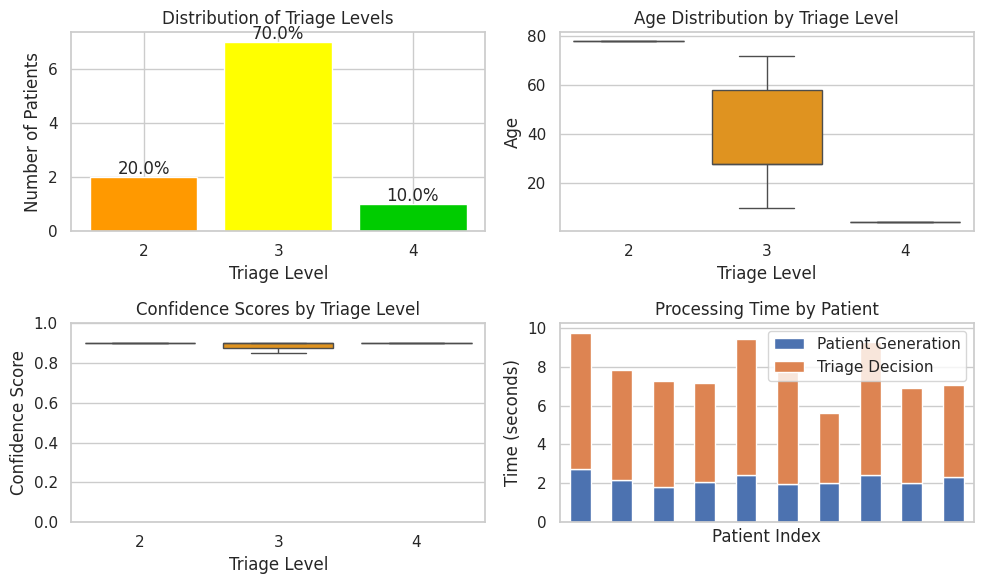


=== Key Findings ===
- Most common triage level: Level 3 (Urgent (Yellow))
- Average model confidence: 89.0%
- Gender distribution: {'Male': 8, 'Female': 2}
- Top chief complaints: Generalized weakness and dizziness, Right ankle pain after falling off swing, Migraine
- Total processing time for all 10 patients: 78.48 seconds


In [ ]:
# Run the experiment with 10 synthetic patients
# Uncomment to run the experiment
results = run_triage_experiment(num_patients=10, verbose=True)
analyze_results(results)


<div style="background: linear-gradient(135deg, #001a70 0%, #0055d4 100%); color: white; padding: 25px; margin-top: 30px; text-align: center; border-radius: 10px;">
<h2 style="margin-top: 0;">Conclusion</h2>

<div style="background: white; border-radius: 12px; padding: 20px; margin-top: 20px; color: #333; text-align: left;">
<p>This notebook demonstrates how generative AI can be applied to healthcare triage systems:</p>

<ol>
    <li><strong>Patient Generation:</strong> Gemini successfully creates diverse, medically coherent patient profiles.</li>
    <li><strong>Triage Decision-Making:</strong> ChatGPT effectively analyzes patient data and assigns appropriate triage levels with clinical rationale.</li>
    <li><strong>Analysis:</strong> The system provides insights into triage distribution, processing efficiency, and decision confidence.</li>
</ol>

<h3 style="color: #0055d4;">Future Enhancements</h3>
<ul>
    <li>Integrate with electronic health record systems</li>
    <li>Add validation against expert clinician decisions</li>
    <li>Expand to specialty-specific triage protocols</li>
    <li>Implement real-time monitoring dashboard</li>
</ul>

<h3 style="color: #0055d4;">Limitations</h3>
<ul>
    <li>Model outputs should always be verified by healthcare professionals</li>
    <li>Clinical accuracy depends on prompt design and model capabilities</li>
    <li>System requires rigorous testing before clinical implementation</li>
</ul>

<p style="font-style: italic; margin-top: 20px; color: #0055d4;">This laboratory exercise demonstrates the potential of GenAI to accelerate healthcare innovation while maintaining clinical rigor and patient safety.</p>
</div>
</div>

<div style="background: linear-gradient(135deg, #fff0e0 0%, #ffe6cc 100%); border-radius: 12px; padding: 25px; margin-bottom: 25px; border: 1px solid #ff9933;">
<h2 style="color: #cc6600; margin-top: 0; font-size: 24px; padding-bottom: 10px; border-bottom: 2px solid #cc6600;">👥 Human-in-the-Loop Triage Integration</h2>
<p style="line-height: 1.6;">The updated triage system now incorporates healthcare provider expertise through a human-in-the-loop approach, ensuring critical oversight of AI decisions.</p>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Key Enhancements:</h3>
    <ul style="padding-left: 20px;">
        <li><strong>Confidence Threshold:</strong> The system now uses a 95% confidence threshold to identify uncertain decisions</li>
        <li><strong>Interactive Confirmation:</strong> Healthcare providers review and can override AI suggestions</li>
        <li><strong>Decision Documentation:</strong> The system records whether the provider confirmed or modified the AI recommendation</li>
        <li><strong>Full Transparency:</strong> Providers see complete patient information and AI reasoning before making decisions</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Workflow Process:</h3>
    <ol style="padding-left: 20px;">
        <li>AI analyzes patient data and assigns a preliminary triage level</li>
        <li>System displays patient information and AI's assessment to the healthcare provider</li>
        <li>If AI confidence is below 95%, a warning is prominently displayed</li>
        <li>Provider reviews the suggestion and selects the final triage level</li>
        <li>The system documents whether the provider confirmed or changed the AI recommendation</li>
        <li>Final triage decision receives 100% confidence as it has been validated by a healthcare professional</li>
    </ol>
</div>
<div style="background-color: #fff9e6; padding: 15px; border-radius: 8px; margin-top: 15px; border-left: 4px solid #ff9933;">
    <h3 style="color: #cc6600; margin-top: 0;">Clinical Benefits:</h3>
    <ul style="padding-left: 20px; line-height: 1.7;">
        <li><strong>Safety Enhancement:</strong> Prevents over-reliance on AI by requiring human verification</li>
        <li><strong>Knowledge Transfer:</strong> Clinicians can learn from AI suggestions while applying their expertise</li>
        <li><strong>Audit Trail:</strong> Creates documentation of decision-making process for quality improvement</li>
        <li><strong>Continuous Improvement:</strong> System can track agreement rates between AI and providers to identify patterns</li>
    </ul>
</div>
<div style="background-color: white; padding: 15px; border-radius: 8px; margin-top: 15px;">
    <h3 style="color: #cc6600; margin-top: 0;">Implementation Highlights:</h3>
    <pre style="background-color: #f8f8f8; padding: 10px; border-radius: 4px; font-size: 12px; overflow-x: auto; margin: 0;">
# Key code updates:
if triage_decision["confidence"] < confidence_threshold:
    print(f"⚠️ ATTENTION: AI confidence ({triage_decision['confidence']*100:.1f}%) is below threshold")


In [ ]:
def triage_patient(patient_data, confidence_threshold=0.95):
    """
    Determine triage level using OpenAI's ChatGPT

    Args:
        patient_data: Dictionary containing patient information
        confidence_threshold: Minimum confidence level required (default: 0.95)

    Returns:
        dict: Triage decision including level, confidence, and rationale
    """
    # Convert patient data to text format for the prompt
    patient_text = json.dumps(patient_data, indent=2)

    # Create prompt for OpenAI
    prompt = f"""
    You are an experienced emergency department triage nurse.
    Based on the following patient information, assign an appropriate triage level using the Emergency Severity Index (ESI) from 1-5:

    - Level 1 (Immediate/Red): Life-threatening conditions requiring immediate treatment
    - Level 2 (Very Urgent/Orange): High risk, potentially life-threatening, rapid assessment needed
    - Level 3 (Urgent/Yellow): Serious but stable condition, requires timely assessment
    - Level 4 (Standard/Green): Standard cases, no immediate danger
    - Level 5 (Non-Urgent/Blue): Minor conditions that can safely wait

    PATIENT INFORMATION:
    {patient_text}

    Provide your assessment in the following JSON format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE_0_TO_1,
      "rationale": "DETAILED_CLINICAL_RATIONALE",
      "recommended_actions": ["ACTION1", "ACTION2", ...]
    }}

    Ensure your triage decision is evidence-based and considers the patient's vitals, symptoms, and medical history.
    """

    try:
        # Call OpenAI API
        response = openai.chat.completions.create(
            model="gpt-4o",  # or gpt-3.5-turbo
            messages=[
                {"role": "system", "content": "You are an experienced emergency medicine triage nurse. Provide accurate, evidence-based triage decisions."},
                {"role": "user", "content": prompt}
            ],
            temperature=0.2,
            max_tokens=1000
        )

        # Extract the response text
        response_text = response.choices[0].message.content

        # Find JSON content (between curly braces)
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > 0:
            json_content = response_text[json_start:json_end]
            triage_decision = json.loads(json_content)

            # Always present patient information and request user confirmation
            print("\n==== PATIENT INFORMATION ====")
            print(patient_text)
            print("\n==== AI TRIAGE SUGGESTION ====")
            print(f"Level {triage_decision['triage_level']}: {triage_decision['triage_category']}")
            print(f"Confidence: {triage_decision['confidence']*100:.1f}%")
            print(f"Rationale: {triage_decision['rationale']}")

            # Highlight if confidence is below threshold
            if triage_decision["confidence"] < confidence_threshold:
                print(f"\n⚠️ ATTENTION: AI confidence ({triage_decision['confidence']*100:.1f}%) is below threshold ({confidence_threshold*100:.0f}%)")

            # Get user input using dropdown-like interface
            print("\nPlease confirm or adjust the triage level:")
            print("1: Immediate/Red - Life-threatening conditions requiring immediate treatment")
            print("2: Very Urgent/Orange - High risk, potentially life-threatening, rapid assessment needed")
            print("3: Urgent/Yellow - Serious but stable condition, requires timely assessment")
            print("4: Standard/Green - Standard cases, no immediate danger")
            print("5: Non-Urgent/Blue - Minor conditions that can safely wait")

            while True:
                try:
                    user_level = int(input(f"Enter triage level (1-5) [AI suggested: {triage_decision['triage_level']}]: "))
                    if 1 <= user_level <= 5:
                        # Update triage level based on user input
                        triage_categories = {
                            1: "Immediate (Red)",
                            2: "Very Urgent (Orange)",
                            3: "Urgent (Yellow)",
                            4: "Standard (Green)",
                            5: "Non-Urgent (Blue)"
                        }

                        # Record if user changed the AI suggestion
                        if user_level != triage_decision['triage_level']:
                            original_level = triage_decision['triage_level']
                            original_category = triage_decision['triage_category']

                            triage_decision["triage_level"] = user_level
                            triage_decision["triage_category"] = triage_categories[user_level]
                            triage_decision["confidence"] = 1.0  # Set confidence to 100% for user decisions
                            triage_decision["rationale"] += f"\n\nNote: Healthcare provider changed triage level from AI-suggested Level {original_level} ({original_category}) to Level {user_level} ({triage_categories[user_level]})."
                        else:
                            # User confirmed AI suggestion
                            triage_decision["confidence"] = 1.0  # Set confidence to 100% for confirmed decisions
                            triage_decision["rationale"] += "\n\nNote: AI-suggested triage level was confirmed by healthcare provider."
                        break
                    else:
                        print("Invalid input. Please enter a number between 1 and 5.")
                except ValueError:
                    print("Invalid input. Please enter a number between 1 and 5.")

            return triage_decision
        else:
            raise ValueError("Could not extract valid JSON from API response")

    except Exception as e:
        print(f"Error in triage decision: {e}")
        # Return fallback triage data
        return {
            "triage_level": 3,
            "triage_category": "Urgent (Yellow)",
            "confidence": 0.75,
            "rationale": "Fallback triage decision due to API error",
            "recommended_actions": ["Assessment by physician", "Vital signs monitoring"]
        }


Starting GenAI-Assisted Medical Triage Experiment with 3 patients

Processing Patient 1/3...

==== PATIENT INFORMATION ====
{
  "patient_id": "PT-20250922-1942-9876",
  "age": 52,
  "sex": "Male",
  "chief_complaint": "Right shoulder pain after a fall",
  "symptoms": [
    "Right shoulder pain",
    "Limited range of motion in right arm",
    "Swelling around the right shoulder",
    "Bruising"
  ],
  "medical_history": [
    "Hypertension",
    "Hyperlipidemia"
  ],
  "medications": [
    "Lisinopril 20mg daily",
    "Atorvastatin 40mg daily"
  ],
  "allergies": [
    "Penicillin"
  ],
  "vitals": {
    "temperature": 98.9,
    "heart_rate": 88,
    "blood_pressure": "142/88",
    "respiratory_rate": 18,
    "oxygen_saturation": 97
  },
  "pain_score": 7
}

==== AI TRIAGE SUGGESTION ====
Level 3: Urgent/Yellow
Confidence: 90.0%
Rationale: The patient is a 52-year-old male presenting with right shoulder pain, limited range of motion, swelling, and bruising following a fall. His vital s


    ## Patient ID: PT-20250922-1942-9876

    **Demographics:** 52-year-old Male
    **Chief Complaint:** Right shoulder pain after a fall

    **Symptoms:**
    - Right shoulder pain, Limited range of motion in right arm, Swelling around the right shoulder, Bruising

    **Medical History:**
    - Hypertension, Hyperlipidemia

    **Medications:**
    - Lisinopril 20mg daily, Atorvastatin 40mg daily

    **Allergies:**
    - Penicillin

    **Vitals:**
    - Temperature: 98.9°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 142/88
    - Respiratory Rate: 18 breaths/min
    - Oxygen Saturation: 97%

    **Pain Score:** 7/10
    

--------------------------------------------------------------------------------

Processing Patient 2/3...

==== PATIENT INFORMATION ====
{
  "patient_id": "PT-20250922-1942-9876",
  "age": 28,
  "sex": "Male",
  "chief_complaint": "Ankle pain after tripping",
  "symptoms": [
    "Pain in left ankle",
    "Swelling around ankle",
    "Difficulty bearing weight"
  ],
  "medical_history": [
    "None"
  ],
  "medications": [
    "None"
  ],
  "allergies": [
    "None"
  ],
  "vitals": {
    "temperature": 98.6,
    "heart_rate": 88,
    "blood_pressure": "125/78",
    "respiratory_rate": 16,
    "oxygen_saturation": 99
  },
  "pain_score": 6
}

==== AI TRIAGE SUGGESTION ====
Level 4: Standard/Green
Confidence: 90.0%
Rationale: The patient is a 28-year-old male presenting with ankle pain, swelling, and difficulty bearing weight after tripping. His vital signs are stable, with no indication of systemic involvement or life-threatening conditions. The pain score is moderate at 6, and there 


    ## Patient ID: PT-20250922-1942-9876

    **Demographics:** 28-year-old Male
    **Chief Complaint:** Ankle pain after tripping

    **Symptoms:**
    - Pain in left ankle, Swelling around ankle, Difficulty bearing weight

    **Medical History:**
    - None

    **Medications:**
    - None

    **Allergies:**
    - None

    **Vitals:**
    - Temperature: 98.6°F
    - Heart Rate: 88 bpm
    - Blood Pressure: 125/78
    - Respiratory Rate: 16 breaths/min
    - Oxygen Saturation: 99%

    **Pain Score:** 6/10
    

--------------------------------------------------------------------------------

Processing Patient 3/3...

==== PATIENT INFORMATION ====
{
  "patient_id": "PT-20250922-1942-7655",
  "age": 5,
  "sex": "Male",
  "chief_complaint": "Fever and cough",
  "symptoms": [
    "Cough",
    "Fever",
    "Runny nose",
    "Lethargy",
    "Decreased appetite"
  ],
  "medical_history": [
    "Asthma (intermittent)"
  ],
  "medications": [
    "Albuterol (as needed)"
  ],
  "allergies": [
    "None known"
  ],
  "vitals": {
    "temperature": 102.5,
    "heart_rate": 120,
    "blood_pressure": "90/60",
    "respiratory_rate": 28,
    "oxygen_saturation": 94
  },
  "pain_score": 2
}

==== AI TRIAGE SUGGESTION ====
Level 2: Very Urgent/Orange
Confidence: 90.0%
Rationale: The patient is a 5-year-old male presenting with fever, cough, runny nose, lethargy, and decreased appetite. He has a history of intermittent asthma and is currently experiencing respiratory symptoms with a fever of 102.5°F. His vit


    ## Patient ID: PT-20250922-1942-7655

    **Demographics:** 5-year-old Male
    **Chief Complaint:** Fever and cough

    **Symptoms:**
    - Cough, Fever, Runny nose, Lethargy, Decreased appetite

    **Medical History:**
    - Asthma (intermittent)

    **Medications:**
    - Albuterol (as needed)

    **Allergies:**
    - None known

    **Vitals:**
    - Temperature: 102.5°F
    - Heart Rate: 120 bpm
    - Blood Pressure: 90/60
    - Respiratory Rate: 28 breaths/min
    - Oxygen Saturation: 94%

    **Pain Score:** 2/10
    

--------------------------------------------------------------------------------

Experiment completed successfully!

=== Triage Experiment Summary ===

Total patients processed: 3

Triage Level Distribution:
Level 2 (Very Urgent (Orange)): 2 patients (66.7%)
Level 3 (Urgent (Yellow)): 1 patients (33.3%)

Average patient generation time: 2.15 seconds
Average triage decision time: 9.29 seconds
Total average processing time per patient: 11.44 seconds


/tmp/ipython-input-2058656404.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='age', data=results_df, palette=colors[:len(level_counts)])
/tmp/ipython-input-2058656404.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='triage_level', y='confidence', data=results_df, palette=colors[:len(level_counts)])


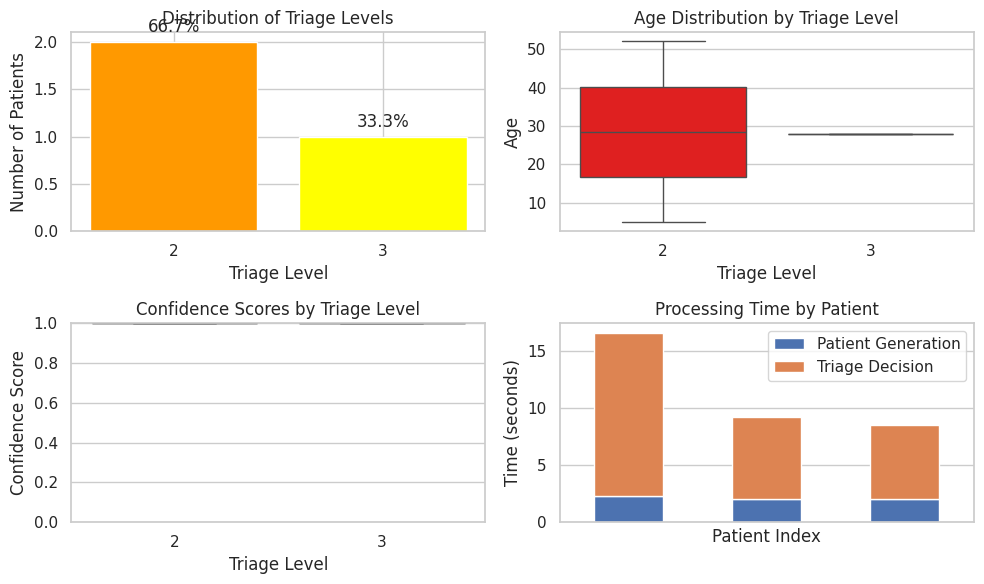


=== Key Findings ===
- Most common triage level: Level 2 (Very Urgent (Orange))
- Average model confidence: 100.0%
- Gender distribution: {'Male': 3}
- Top chief complaints: Right shoulder pain after a fall, Ankle pain after tripping, Fever and cough
- Total processing time for all 3 patients: 34.32 seconds


In [ ]:
# Run the experiment with 10 synthetic patients
# Uncomment to run the experiment
results = run_triage_experiment(num_patients=3, verbose=True)
analyze_results(results)


<div style="background-color: #f5f0fa; border-radius: 10px; padding: 20px; margin-bottom: 25px; border: 1px solid #9c27b0;">
<h2 style="color: #6a1b9a; margin-top: 0; padding-bottom: 10px; border-bottom: 2px solid #9c27b0;">✋ Hands-On Assignment</h2>
<p>Submit your observations about the benefits and shortcomings of using LLMs for medical triage. Consider what else could be done to improve the system.</p>
<h3 style="color: #6a1b9a; margin-top: 20px;">Tasks:</h3>
<ol>
    <li style="margin-bottom: 10px;"><strong>Prompt Engineering:</strong> Modify prompts for both models and observe impact on results.<br>
    <em>Prompt design has a significant effect on output quality and consistency. Try various approaches and document differences.</em></li>
<li style="margin-bottom: 10px;"><strong>Model Comparison:</strong> Test different OpenAI and Gemini models.<br>
<em>Compare results using <a href="https://platform.openai.com/docs/models" style="color: #6a1b9a;">OpenAI models</a> and <a href="https://ai.google.dev/models/gemini" style="color: #6a1b9a;">Gemini models</a>.</em></li>

<li style="margin-bottom: 10px;"><strong>Documentation:</strong> Submit your observations as a discussion post.<br>
<em>Include screenshots of chart results to support your findings and recommendations.</em></li>
</ol>

<h4 style="color: #6a1b9a; margin-top: 0;">Reflection Questions:</h4>
<ul>
    <li>What are the most promising benefits of AI-assisted triage?</li>
    <li>What are the concerning limitations or risks?</li>
    <li>How might the human-in-the-loop approach be further optimized?</li>
    <li>What additional data or features would improve model performance?</li>
</ul>
</div>
</div>

In [3]:
# Define prompt experiments first
class PromptExperiments:
    """Different prompt engineering strategies for medical triage"""

    # 1. Zero-shot basic prompt
    ZERO_SHOT_BASIC = """
    Analyze this patient and assign a triage level from 1-5:
    {patient_text}

    Response format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE,
      "rationale": "REASONING",
      "recommended_actions": ["ACTION1", "ACTION2"]
    }}
    """

    # 2. Few-shot with examples
    FEW_SHOT = """
    Examples of triage decisions:

    Example 1: 65-year-old with chest pain, sweating, BP 180/110
    → Level 1 (Immediate): Possible MI, needs immediate intervention

    Example 2: 25-year-old with sprained ankle, pain 4/10
    → Level 4 (Standard): Non-urgent orthopedic injury

    Now analyze this patient and assign triage level 1-5:
    {patient_text}

    Use this JSON format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE,
      "rationale": "REASONING",
      "recommended_actions": ["ACTION1", "ACTION2"]
    }}
    """

    # 3. Chain-of-thought prompt
    CHAIN_OF_THOUGHT = """
    You are triaging a patient. Think step-by-step:

    1. First, identify the most concerning symptoms
    2. Consider vital signs and whether they're abnormal
    3. Evaluate risk factors from medical history
    4. Determine if immediate intervention is needed
    5. Assign appropriate triage level

    Patient Information:
    {patient_text}

    Provide your step-by-step analysis, then conclude with:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE,
      "rationale": "DETAILED_REASONING",
      "recommended_actions": ["ACTION1", "ACTION2"]
    }}
    """

    # 4. Role-specific expert prompt
    EXPERT_ROLE = """
    You are Dr. Smith, an emergency physician with 20 years of experience at a Level 1 trauma center.
    You've seen thousands of cases and are known for your accurate, rapid triage decisions.

    Using your expertise, evaluate this patient:
    {patient_text}

    Apply ESI (Emergency Severity Index) criteria:
    - Level 1: Requires immediate life-saving intervention
    - Level 2: High risk/emergent, should be seen within 10 minutes
    - Level 3: Urgent, should be seen within 30 minutes
    - Level 4: Less urgent, can be seen within 60 minutes
    - Level 5: Non-urgent, can be seen within 120 minutes

    Provide assessment as JSON:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE,
      "rationale": "CLINICAL_REASONING",
      "recommended_actions": ["ACTION1", "ACTION2"]
    }}
    """

    # 5. Structured clinical assessment
    STRUCTURED_CLINICAL = """
    Perform systematic triage assessment:

    PATIENT DATA:
    {patient_text}

    ASSESS THE FOLLOWING:
    A. Airway/Breathing: Are there respiratory concerns?
    B. Circulation: Are vital signs stable?
    C. Disability: Is there altered mental status?
    D. Exposure: Are there visible injuries/symptoms?
    E. Full assessment: What is the overall clinical picture?

    Based on ABCDE assessment, assign ESI triage level (1-5).

    Output format:
    {{
      "triage_level": LEVEL_NUMBER,
      "triage_category": "CATEGORY_NAME",
      "confidence": CONFIDENCE_SCORE,
      "rationale": "Include ABCDE findings",
      "recommended_actions": ["ACTION1", "ACTION2"]
    }}
    """

In [4]:
# Fixed patient generation with fallback
def generate_patient_fixed(patient_id=None):
    """Fixed patient generation with better error handling"""
    if not patient_id:
        patient_id = f"PT-{datetime.now().strftime('%Y%m%d-%H%M')}-{random.randint(1000, 9999)}"

    # Use simpler prompt for better reliability
    prompt = f"""Generate a medical emergency room patient. Return ONLY valid JSON:

{{
  "patient_id": "{patient_id}",
  "age": [number between 1-95],
  "sex": "[Male or Female]",
  "chief_complaint": "[main medical complaint]",
  "symptoms": ["symptom1", "symptom2", "symptom3"],
  "medical_history": ["condition1", "condition2"],
  "medications": ["medication1", "medication2"],
  "allergies": ["allergy1"],
  "vitals": {{
    "temperature": [96-104],
    "heart_rate": [50-150],
    "blood_pressure": "[systolic/diastolic]",
    "respiratory_rate": [12-30],
    "oxygen_saturation": [85-100]
  }},
  "pain_score": [0-10]
}}

Create diverse cases: Include various ages, different chief complaints (not just chest pain), and varying severity levels."""

    try:
        # Try gemini-2.0-flash-exp first, then fallback to 1.5
        model_names = ['gemini-2.0-flash-exp', 'gemini-1.5-flash', 'gemini-1.5-pro']

        for model_name in model_names:
            try:
                print(f"Trying {model_name}...")
                gemini_model = genai.GenerativeModel(model_name)
                response = gemini_model.generate_content(prompt)
                response_text = response.text.strip()

                # Clean response
                if "```json" in response_text:
                    response_text = response_text.split("```json")[1].split("```")[0]
                elif "```" in response_text:
                    response_text = response_text.split("```")[1].split("```")[0]

                # Parse JSON
                patient_data = json.loads(response_text)
                print(f"✅ Patient generated with {model_name}")
                return patient_data

            except Exception as e:
                print(f"⚠️ {model_name} failed: {str(e)[:100]}")
                continue

        # If all models fail, return None
        print("❌ All Gemini models failed")
        return None

    except Exception as e:
        print(f"❌ Patient generation error: {e}")
        return None

# %%
# Predefined fallback patients
FALLBACK_PATIENTS = [
    {
        "patient_id": "PT-FALLBACK-001",
        "age": 67,
        "sex": "Male",
        "chief_complaint": "Crushing chest pain with radiation to left arm",
        "symptoms": ["chest pain", "shortness of breath", "diaphoresis", "nausea"],
        "medical_history": ["hypertension", "diabetes type 2", "hyperlipidemia"],
        "medications": ["metformin", "lisinopril", "atorvastatin"],
        "allergies": ["penicillin"],
        "vitals": {
            "temperature": 98.4,
            "heart_rate": 112,
            "blood_pressure": "165/95",
            "respiratory_rate": 24,
            "oxygen_saturation": 92
        },
        "pain_score": 8
    },
    {
        "patient_id": "PT-FALLBACK-002",
        "age": 7,
        "sex": "Female",
        "chief_complaint": "Fever and lethargy for 2 days",
        "symptoms": ["fever", "fatigue", "poor appetite", "mild cough"],
        "medical_history": ["asthma"],
        "medications": ["albuterol inhaler PRN"],
        "allergies": ["none"],
        "vitals": {
            "temperature": 101.5,
            "heart_rate": 105,
            "blood_pressure": "95/60",
            "respiratory_rate": 22,
            "oxygen_saturation": 97
        },
        "pain_score": 3
    },
    {
        "patient_id": "PT-FALLBACK-003",
        "age": 34,
        "sex": "Female",
        "chief_complaint": "Severe headache with vision changes",
        "symptoms": ["headache", "blurred vision", "photophobia", "neck stiffness"],
        "medical_history": ["migraines"],
        "medications": ["sumatriptan PRN"],
        "allergies": ["sulfa drugs"],
        "vitals": {
            "temperature": 99.1,
            "heart_rate": 88,
            "blood_pressure": "145/88",
            "respiratory_rate": 16,
            "oxygen_saturation": 99
        },
        "pain_score": 9
    },
    {
        "patient_id": "PT-FALLBACK-004",
        "age": 22,
        "sex": "Male",
        "chief_complaint": "Twisted ankle playing basketball",
        "symptoms": ["ankle pain", "swelling", "difficulty bearing weight"],
        "medical_history": ["none"],
        "medications": ["none"],
        "allergies": ["none"],
        "vitals": {
            "temperature": 98.6,
            "heart_rate": 72,
            "blood_pressure": "118/75",
            "respiratory_rate": 14,
            "oxygen_saturation": 100
        },
        "pain_score": 5
    },
    {
        "patient_id": "PT-FALLBACK-005",
        "age": 81,
        "sex": "Female",
        "chief_complaint": "Fall at home, hip pain",
        "symptoms": ["hip pain", "inability to walk", "bruising"],
        "medical_history": ["osteoporosis", "hypertension", "atrial fibrillation"],
        "medications": ["alendronate", "metoprolol", "warfarin"],
        "allergies": ["codeine"],
        "vitals": {
            "temperature": 97.9,
            "heart_rate": 95,
            "blood_pressure": "135/82",
            "respiratory_rate": 18,
            "oxygen_saturation": 96
        },
        "pain_score": 7
    }
]

In [5]:
def test_triage_with_prompt(patient_data, prompt_template, model="gpt-4o", temperature=0.2, verbose=True):
    """
    Test a specific prompt template with verbose output

    Args:
        patient_data: Patient information dictionary
        prompt_template: The prompt template to use
        model: Model to use (gpt-4o, gpt-3.5-turbo, etc.)
        temperature: Model temperature
        verbose: Whether to print detailed output

    Returns:
        dict: Results including triage decision and metrics
    """
    patient_text = json.dumps(patient_data, indent=2)
    prompt = prompt_template.format(patient_text=patient_text)

    if verbose:
        print(f"\n{'='*60}")
        print(f"MODEL: {model}")
        print(f"PATIENT ID: {patient_data.get('patient_id', 'Unknown')}")
        print(f"CHIEF COMPLAINT: {patient_data.get('chief_complaint', 'Unknown')}")
        print(f"{'='*60}")

    start_time = time.time()

    try:
        if model.startswith('gpt'):
            # OpenAI models
            if verbose:
                print(f"Calling OpenAI API with {model}...")

            response = openai.chat.completions.create(
                model=model,
                messages=[
                    {"role": "system", "content": "You are a medical triage assistant."},
                    {"role": "user", "content": prompt}
                ],
                temperature=temperature,
                max_tokens=1000
            )
            response_text = response.choices[0].message.content

        elif model.startswith('gemini'):
            # Gemini models
            if verbose:
                print(f"Calling Gemini API with {model}...")

            gemini_model = genai.GenerativeModel(model)
            response = gemini_model.generate_content(
                prompt,
                generation_config=genai.types.GenerationConfig(
                    temperature=temperature,
                    max_output_tokens=1000
                )
            )
            response_text = response.text

            time.sleep(2)

        response_time = time.time() - start_time

        if verbose:
            print(f"\n⏱️ Response Time: {response_time:.2f} seconds")
            print(f"\n📝 RAW RESPONSE:")
            print("-" * 40)
            print(response_text[:1000])  # Show first 1000 chars
            if len(response_text) > 1000:
                print(f"... (truncated, total length: {len(response_text)} chars)")
            print("-" * 40)

        # Extract JSON from response
        json_start = response_text.find('{')
        json_end = response_text.rfind('}') + 1

        if json_start >= 0 and json_end > 0:
            json_content = response_text[json_start:json_end]
            triage_decision = json.loads(json_content)

            if verbose:
                print(f"\n✅ EXTRACTED TRIAGE DECISION:")
                print(f"  Level: {triage_decision.get('triage_level', 'N/A')}")
                print(f"  Category: {triage_decision.get('triage_category', 'N/A')}")
                print(f"  Confidence: {triage_decision.get('confidence', 'N/A')}")
                print(f"  Rationale: {triage_decision.get('rationale', 'N/A')[:200]}...")
        else:
            # Fallback if JSON extraction fails
            if verbose:
                print(f"\n⚠️ Failed to extract JSON from response")

            triage_decision = {
                "triage_level": 3,
                "triage_category": "Urgent",
                "confidence": 0.5,
                "rationale": "Failed to extract structured response",
                "recommended_actions": ["Manual review required"]
            }

        return {
            "triage_decision": triage_decision,
            "response_time": response_time,
            "response_length": len(response_text),
            "model": model,
            "temperature": temperature,
            "full_response": response_text
        }

    except Exception as e:
        if verbose:
            print(f"\n❌ ERROR: {str(e)}")

        return {
            "error": str(e),
            "model": model,
            "response_time": time.time() - start_time
        }

In [6]:
def run_model_comparison_experiment_fixed(num_patients=5):
    """
    Fixed model comparison that handles all issues
    """
    # Corrected model names
    models_to_test = [
        "gpt-4o",
        "gpt-3.5-turbo",
        "gemini-1.5-flash",
        "gemini-1.5-pro"
    ]

    # All prompt types
    prompts_to_test = {
        "Zero-Shot": PromptExperiments.ZERO_SHOT_BASIC,
        "Few-Shot": PromptExperiments.FEW_SHOT,
        "Chain-of-Thought": PromptExperiments.CHAIN_OF_THOUGHT,
        "Expert-Role": PromptExperiments.EXPERT_ROLE,
        "Structured": PromptExperiments.STRUCTURED_CLINICAL
    }

    results = []

    print("Starting Fixed Model Comparison Experiment")
    print("="*80)

    # Try to generate patients, use fallback if needed
    patients = []
    print("Generating patients...")

    for i in range(num_patients):
        print(f"\nPatient {i+1}/{num_patients}:")
        patient = generate_patient_fixed()

        if patient:
            patients.append(patient)
            print(f"✅ Generated: {patient['age']}yo {patient['sex']}, {patient['chief_complaint'][:50]}...")
        else:
            # Use fallback patient
            if i < len(FALLBACK_PATIENTS):
                patients.append(FALLBACK_PATIENTS[i])
                print(f"📋 Using fallback patient {i+1}")
            else:
                # Generate a simple random patient
                simple_patient = {
                    "patient_id": f"PT-SIMPLE-{i+1}",
                    "age": random.randint(18, 80),
                    "sex": random.choice(["Male", "Female"]),
                    "chief_complaint": random.choice([
                        "Chest pain", "Abdominal pain", "Headache",
                        "Shortness of breath", "Back pain"
                    ]),
                    "symptoms": ["pain", "discomfort"],
                    "medical_history": ["none"],
                    "medications": ["none"],
                    "allergies": ["none"],
                    "vitals": {
                        "temperature": 98.6,
                        "heart_rate": 80,
                        "blood_pressure": "120/80",
                        "respiratory_rate": 16,
                        "oxygen_saturation": 98
                    },
                    "pain_score": 5
                }
                patients.append(simple_patient)
                print(f"📋 Using simple generated patient {i+1}")

    if len(patients) == 0:
        print("❌ No patients available. Exiting.")
        return pd.DataFrame()

    print(f"\n✅ Total patients ready: {len(patients)}")
    print("="*80)

    # Test each combination
    total_tests = len(patients) * len(models_to_test) * len(prompts_to_test)
    current_test = 0

    for patient in patients:
        print(f"\n{'='*70}")
        print(f"PATIENT: {patient['patient_id']}")
        print(f"Demographics: {patient['age']}yo {patient['sex']}")
        print(f"Chief Complaint: {patient['chief_complaint']}")
        print(f"{'='*70}")

        for model in models_to_test:
            for prompt_name, prompt_template in prompts_to_test.items():
                current_test += 1
                print(f"\n[Test {current_test}/{total_tests}] {model} with {prompt_name} prompt")

                try:
                    result = test_triage_with_prompt(
                        patient,
                        prompt_template,
                        model=model,
                        temperature=0.2,
                        verbose=True  # Show details
                    )

                    # Add metadata
                    result["patient_id"] = patient["patient_id"]
                    result["patient_age"] = patient["age"]
                    result["chief_complaint"] = patient["chief_complaint"]
                    result["prompt_type"] = prompt_name
                    result["model_family"] = "OpenAI" if model.startswith("gpt") else "Gemini"

                    results.append(result)

                except Exception as e:
                    print(f"❌ Error in test: {str(e)[:200]}")
                    results.append({
                        "patient_id": patient["patient_id"],
                        "patient_age": patient["age"],
                        "chief_complaint": patient["chief_complaint"],
                        "prompt_type": prompt_name,
                        "model": model,
                        "model_family": "OpenAI" if model.startswith("gpt") else "Gemini",
                        "error": str(e)[:500],
                        "response_time": 0
                    })

                # Rate limiting
                time.sleep(0.5)

    print("\n" + "="*80)
    print(f"EXPERIMENT COMPLETE - {len(results)} tests run")
    print("="*80)

    return pd.DataFrame(results)

In [7]:
# Execute the fixed experiment
print("Starting the fixed medical triage experiment...")
print("This will handle all API issues gracefully.\n")

# Run with 3 patients for testing (increase for full experiment)
results_df = run_model_comparison_experiment_fixed(num_patients=3)

# Display summary
if len(results_df) > 0:
    print("\n" + "="*70)
    print("RESULTS SUMMARY")
    print("="*70)

    # Basic stats
    print(f"\n📊 Statistics:")
    print(f"  Total tests: {len(results_df)}")
    print(f"  Successful: {results_df['error'].isna().sum()}")
    print(f"  Failed: {results_df['error'].notna().sum()}")

    # Model performance
    valid_results = results_df[results_df['error'].isna()]
    if len(valid_results) > 0:
        print(f"\n⏱️ Average Response Times:")
        for model in valid_results['model'].unique():
            avg_time = valid_results[valid_results['model'] == model]['response_time'].mean()
            print(f"  {model}: {avg_time:.2f} seconds")

        print(f"\n📝 Tests by Prompt Type:")
        for prompt in valid_results['prompt_type'].unique():
            count = len(valid_results[valid_results['prompt_type'] == prompt])
            print(f"  {prompt}: {count} successful tests")

    # Save results
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f'triage_experiment_results_{timestamp}.csv'
    results_df.to_csv(filename, index=False)
    print(f"\n💾 Results saved to: {filename}")

Starting the fixed medical triage experiment...
This will handle all API issues gracefully.

Starting Fixed Model Comparison Experiment
Generating patients...

Patient 1/3:
Trying gemini-2.0-flash-exp...
✅ Patient generated with gemini-2.0-flash-exp
✅ Generated: 62yo Male, Sudden onset of severe headache and neck stiffness...

Patient 2/3:
Trying gemini-2.0-flash-exp...
✅ Patient generated with gemini-2.0-flash-exp
✅ Generated: 62yo Female, Sudden onset of severe headache and vision changes...

Patient 3/3:
Trying gemini-2.0-flash-exp...
✅ Patient generated with gemini-2.0-flash-exp
✅ Generated: 67yo Male, Sudden onset of severe headache and neck stiffness...

✅ Total patients ready: 3

PATIENT: PT-20250924-1950-7333
Demographics: 62yo Male
Chief Complaint: Sudden onset of severe headache and neck stiffness

[Test 1/60] gpt-4o with Zero-Shot prompt

MODEL: gpt-4o
PATIENT ID: PT-20250924-1950-7333
CHIEF COMPLAINT: Sudden onset of severe headache and neck stiffness
Calling OpenAI API wit


❌ ERROR: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
Please retry in 52.565122863s.



[Test 17/60] gemini-1.5-pro with Few-Shot prompt

MODEL: gemini-1.5-pro
PATIENT ID: PT-20250924-1950-7333
CHIEF COMPLAINT: Sudden onset of severe headache and neck stiffness
Calling Gemini API with gemini-1.5-pro...

❌ ERROR: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
Please retry in 51.898287603s.



[Test 18/60] gemini-1.5-pro with Chain-of-Thought prompt

MODEL: gemini-1.5-pro
PATIENT ID: PT-20250924-1950-7333
CHIEF COMPLAINT: Sudden onset of severe headache and neck stiffness
Calling Gemini API with gemini-1.5-pro...

❌ ERROR: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0
Please retry in 51.256507051s.



[Test 19/60] gemini-1.5-pro with Expert-Role prompt

MODEL: gemini-1.5-pro
PATIENT ID: PT-20250924-1950-7333
CHIEF COMPLAINT: Sudden onset of severe headache and neck stiffness
Calling Gemini API with gemini-1.5-pro...

❌ ERROR: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
Please retry in 50.585249431s.



[Test 20/60] gemini-1.5-pro with Structured prompt

MODEL: gemini-1.5-pro
PATIENT ID: PT-20250924-1950-7333
CHIEF COMPLAINT: Sudden onset of severe headache and neck stiffness
Calling Gemini API with gemini-1.5-pro...

❌ ERROR: 429 POST https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-pro:generateContent?%24alt=json%3Benum-encoding%3Dint: You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0
Please retry in 49.917044909s.

PATIENT: PT-20250924-1950-5576
Demographics: 62yo Female
Chief Complaint: Sudden onset of severe he

KeyboardInterrupt: 

In [ ]:
results_df = pd.read_csv('triage_experiment_results_20250922_195722.csv')

print("Data loaded successfully!")
print(f"Total records: {len(results_df)}")
print(f"Columns: {results_df.columns.tolist()}")
print(f"\nFirst few rows:")
print(results_df.head())

In [ ]:
# Extract triage level and confidence from the triage_decision column
def extract_triage_info(row):
    """Extract triage level and confidence from triage_decision string"""
    try:
        if pd.isna(row['triage_decision']):
            return pd.Series({'triage_level': None, 'confidence': None})

        # Parse the JSON string
        if isinstance(row['triage_decision'], str):
            triage_dict = json.loads(row['triage_decision'].replace("'", '"'))
        else:
            triage_dict = row['triage_decision']

        return pd.Series({
            'triage_level': triage_dict.get('triage_level', None),
            'confidence': triage_dict.get('confidence', None)
        })
    except:
        return pd.Series({'triage_level': None, 'confidence': None})

# Apply extraction
triage_info = results_df.apply(extract_triage_info, axis=1)
results_df['triage_level'] = triage_info['triage_level']
results_df['confidence'] = triage_info['confidence']

# Filter out rows with errors for most analyses
valid_results = results_df[results_df['error'].isna()].copy()

print(f"\nValid results: {len(valid_results)} out of {len(results_df)}")
print(f"Error rate: {(len(results_df) - len(valid_results)) / len(results_df) * 100:.1f}%")

In [ ]:
# Create comprehensive visualization
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Medical Triage LLM Experiment Results', fontsize=20, fontweight='bold')

# Chart 1: Response Time by Model
ax1 = plt.subplot(3, 4, 1)
model_times = valid_results.groupby('model')['response_time'].agg(['mean', 'std'])
model_times['mean'].plot(kind='bar', ax=ax1, color='steelblue', yerr=model_times['std'], capsize=4)
ax1.set_title('Average Response Time by Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('Time (seconds)')
ax1.set_xlabel('Model')
ax1.grid(alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Chart 2: Response Time by Prompt Type
ax2 = plt.subplot(3, 4, 2)
prompt_times = valid_results.groupby('prompt_type')['response_time'].agg(['mean', 'std'])
prompt_times['mean'].plot(kind='bar', ax=ax2, color='coral', yerr=prompt_times['std'], capsize=4)
ax2.set_title('Average Response Time by Prompt Type', fontsize=12, fontweight='bold')
ax2.set_ylabel('Time (seconds)')
ax2.set_xlabel('Prompt Type')
ax2.grid(alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Chart 3: Model Family Comparison
ax3 = plt.subplot(3, 4, 3)
family_comparison = valid_results.groupby('model_family').agg({
    'response_time': 'mean',
    'confidence': 'mean',
    'response_length': 'mean'
})
x = np.arange(len(family_comparison.index))
width = 0.25
ax3.bar(x - width, family_comparison['response_time'], width, label='Response Time (s)', color='skyblue')
ax3.bar(x, family_comparison['confidence']*10, width, label='Confidence (×10)', color='lightgreen')
ax3.bar(x + width, family_comparison['response_length']/1000, width, label='Length (k chars)', color='salmon')
ax3.set_xlabel('Model Family')
ax3.set_xticks(x)
ax3.set_xticklabels(family_comparison.index)
ax3.set_title('OpenAI vs Gemini Performance', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# Chart 4: Confidence Distribution by Model
ax4 = plt.subplot(3, 4, 4)
confidence_data = valid_results[valid_results['confidence'].notna()]
if len(confidence_data) > 0:
    sns.boxplot(data=confidence_data, x='model', y='confidence', ax=ax4)
    ax4.set_title('Confidence Distribution by Model', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Confidence Score')
    ax4.set_xlabel('Model')
    plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45, ha='right')
    ax4.set_ylim(0, 1.1)

# Chart 5: Triage Level Distribution
ax5 = plt.subplot(3, 4, 5)
triage_dist = valid_results[valid_results['triage_level'].notna()]['triage_level'].value_counts().sort_index()
colors_triage = ['#ff0000', '#ff9900', '#ffff00', '#00cc00', '#0099ff']
if len(triage_dist) > 0:
    bars = ax5.bar(triage_dist.index, triage_dist.values,
                   color=[colors_triage[int(i)-1] if int(i) <= 5 else 'gray' for i in triage_dist.index])
    ax5.set_title('Overall Triage Level Distribution', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Triage Level')
    ax5.set_ylabel('Count')
    # Add percentage labels
    for bar in bars:
        height = bar.get_height()
        ax5.text(bar.get_x() + bar.get_width()/2., height,
                f'{height/len(valid_results)*100:.1f}%',
                ha='center', va='bottom', fontsize=9)

# Chart 6: Response Length Distribution
ax6 = plt.subplot(3, 4, 6)
valid_results.boxplot(column='response_length', by='model', ax=ax6)
ax6.set_title('Response Length by Model', fontsize=12, fontweight='bold')
ax6.set_ylabel('Characters')
ax6.set_xlabel('Model')
plt.sca(ax6)
plt.xticks(rotation=45, ha='right')

# Chart 7: Prompt Type Effectiveness Heatmap
ax7 = plt.subplot(3, 4, 7)
pivot_time = valid_results.pivot_table(values='response_time',
                                       index='prompt_type',
                                       columns='model',
                                       aggfunc='mean')
sns.heatmap(pivot_time, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax7, cbar_kws={'label': 'Time (s)'})
ax7.set_title('Response Time Heatmap', fontsize=12, fontweight='bold')

# Chart 8: Error Rate Analysis
ax8 = plt.subplot(3, 4, 8)
error_by_model = results_df.groupby('model')['error'].apply(lambda x: x.notna().sum() / len(x) * 100)
error_by_model.plot(kind='bar', ax=ax8, color='red', alpha=0.7)
ax8.set_title('Error Rate by Model', fontsize=12, fontweight='bold')
ax8.set_ylabel('Error Rate (%)')
ax8.set_xlabel('Model')
plt.setp(ax8.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax8.grid(alpha=0.3)

# Chart 9: Confidence vs Response Time Scatter
ax9 = plt.subplot(3, 4, 9)
for model in valid_results['model'].unique():
    model_data = valid_results[valid_results['model'] == model]
    ax9.scatter(model_data['response_time'], model_data['confidence'],
               label=model, alpha=0.6, s=50)
ax9.set_xlabel('Response Time (s)')
ax9.set_ylabel('Confidence Score')
ax9.set_title('Response Time vs Confidence', fontsize=12, fontweight='bold')
ax9.legend(fontsize=8, loc='best')
ax9.grid(alpha=0.3)

# Chart 10: Patient Age vs Triage Level
ax10 = plt.subplot(3, 4, 10)
if 'patient_age' in valid_results.columns and valid_results['triage_level'].notna().any():
    sns.scatterplot(data=valid_results, x='patient_age', y='triage_level',
                   hue='model', style='prompt_type', ax=ax10, alpha=0.7)
    ax10.set_title('Patient Age vs Triage Level', fontsize=12, fontweight='bold')
    ax10.set_xlabel('Patient Age')
    ax10.set_ylabel('Triage Level')
    ax10.legend(fontsize=6, loc='best')

# Chart 11: Model Consistency Analysis
ax11 = plt.subplot(3, 4, 11)
# Calculate standard deviation of triage levels for each patient across models
patient_consistency = valid_results.groupby('patient_id')['triage_level'].std()
consistency_hist = patient_consistency.value_counts().sort_index()
if len(consistency_hist) > 0:
    consistency_hist.plot(kind='bar', ax=ax11, color='purple', alpha=0.7)
    ax11.set_title('Triage Consistency Across Models', fontsize=12, fontweight='bold')
    ax11.set_xlabel('Std Dev of Triage Levels')
    ax11.set_ylabel('Number of Patients')
    ax11.grid(alpha=0.3)

# Chart 12: Summary Statistics Table
ax12 = plt.subplot(3, 4, 12)
ax12.axis('tight')
ax12.axis('off')

# Create summary statistics
summary_stats = []
for model in valid_results['model'].unique():
    model_data = valid_results[valid_results['model'] == model]
    summary_stats.append([
        model,
        f"{model_data['response_time'].mean():.2f}s",
        f"{model_data['confidence'].mean():.2%}" if model_data['confidence'].notna().any() else "N/A",
        f"{len(model_data)}",
        f"{results_df[results_df['model']==model]['error'].notna().sum()}"
    ])

table = ax12.table(cellText=summary_stats,
                  colLabels=['Model', 'Avg Time', 'Avg Conf', 'Valid', 'Errors'],
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.3, 0.2, 0.2, 0.15, 0.15])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax12.set_title('Model Summary Statistics', fontsize=12, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('triage_analysis_charts.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Charts saved as 'triage_analysis_charts.png'")

In [ ]:
# Create prompt-specific analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Prompt Engineering Impact Analysis', fontsize=16, fontweight='bold')

# Analysis by prompt type
prompt_stats = valid_results.groupby('prompt_type').agg({
    'response_time': ['mean', 'std'],
    'confidence': ['mean', 'std'],
    'response_length': ['mean', 'std']
}).round(3)

print("\n📝 PROMPT ENGINEERING ANALYSIS")
print("="*60)
print("\nDetailed Statistics by Prompt Type:")
print(prompt_stats)

# Chart 1: Response time comparison
ax1 = axes[0, 0]
prompt_times_mean = prompt_stats['response_time']['mean']
prompt_times_std = prompt_stats['response_time']['std']
prompt_times_mean.plot(kind='bar', ax=ax1, color='dodgerblue', yerr=prompt_times_std, capsize=5)
ax1.set_title('Response Time by Prompt Type')
ax1.set_ylabel('Time (seconds)')
ax1.set_xlabel('Prompt Type')
ax1.grid(alpha=0.3)

# Chart 2: Confidence comparison
ax2 = axes[0, 1]
if 'confidence' in prompt_stats.columns:
    prompt_conf_mean = prompt_stats['confidence']['mean']
    prompt_conf_std = prompt_stats['confidence']['std']
    prompt_conf_mean.plot(kind='bar', ax=ax2, color='green', yerr=prompt_conf_std, capsize=5, alpha=0.7)
    ax2.set_title('Average Confidence by Prompt Type')
    ax2.set_ylabel('Confidence Score')
    ax2.set_xlabel('Prompt Type')
    ax2.set_ylim(0, 1)
    ax2.grid(alpha=0.3)

# Chart 3: Response length
ax3 = axes[0, 2]
prompt_length_mean = prompt_stats['response_length']['mean']
prompt_length_mean.plot(kind='bar', ax=ax3, color='orange', alpha=0.7)
ax3.set_title('Response Length by Prompt Type')
ax3.set_ylabel('Characters')
ax3.set_xlabel('Prompt Type')
ax3.grid(alpha=0.3)

# Chart 4: Triage level distribution by prompt
ax4 = axes[1, 0]
triage_by_prompt = valid_results[valid_results['triage_level'].notna()].groupby(['prompt_type', 'triage_level']).size().unstack(fill_value=0)
if not triage_by_prompt.empty:
    triage_by_prompt.plot(kind='bar', stacked=True, ax=ax4,
                          color=['#ff0000', '#ff9900', '#ffff00', '#00cc00', '#0099ff'])
    ax4.set_title('Triage Level Distribution by Prompt Type')
    ax4.set_ylabel('Count')
    ax4.set_xlabel('Prompt Type')
    ax4.legend(title='Triage Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Chart 5: Model-Prompt interaction
ax5 = axes[1, 1]
interaction_data = valid_results.pivot_table(values='confidence',
                                            index='prompt_type',
                                            columns='model_family',
                                            aggfunc='mean')
if not interaction_data.empty:
    interaction_data.plot(kind='bar', ax=ax5, width=0.8)
    ax5.set_title('Confidence: Prompt × Model Family')
    ax5.set_ylabel('Average Confidence')
    ax5.set_xlabel('Prompt Type')
    ax5.legend(title='Model Family')
    ax5.set_ylim(0, 1)
    ax5.grid(alpha=0.3)

# Chart 6: Effectiveness Score (composite metric)
ax6 = axes[1, 2]
# Create effectiveness score: high confidence, low response time
effectiveness = valid_results.groupby('prompt_type').apply(
    lambda x: (x['confidence'].mean() * 10 / x['response_time'].mean())
    if x['confidence'].notna().any() else 0
)
effectiveness.plot(kind='bar', ax=ax6, color='purple', alpha=0.7)
ax6.set_title('Prompt Effectiveness Score')
ax6.set_ylabel('Score (Confidence/Time)')
ax6.set_xlabel('Prompt Type')
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('prompt_engineering_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Prompt analysis charts saved as 'prompt_engineering_analysis.png'")

In [ ]:
# ## 3. Key Findings Summary

# %%
print("\n" + "="*70)
print("KEY FINDINGS SUMMARY")
print("="*70)

# 1. Best performing model
best_model_time = valid_results.groupby('model')['response_time'].mean().idxmin()
best_model_conf = valid_results.groupby('model')['confidence'].mean().idxmax() if valid_results['confidence'].notna().any() else "N/A"

print("\n🏆 BEST PERFORMERS:")
print(f"  Fastest Model: {best_model_time} ({valid_results.groupby('model')['response_time'].mean()[best_model_time]:.2f}s)")
if best_model_conf != "N/A":
    print(f"  Highest Confidence: {best_model_conf} ({valid_results.groupby('model')['confidence'].mean()[best_model_conf]:.2%})")

# 2. Best prompt type
best_prompt_time = valid_results.groupby('prompt_type')['response_time'].mean().idxmin()
best_prompt_conf = valid_results.groupby('prompt_type')['confidence'].mean().idxmax() if valid_results['confidence'].notna().any() else "N/A"

print(f"\n  Best Prompt (Speed): {best_prompt_time}")
if best_prompt_conf != "N/A":
    print(f"  Best Prompt (Confidence): {best_prompt_conf}")

# 3. Model family comparison
print("\n📊 MODEL FAMILY COMPARISON:")
family_stats = valid_results.groupby('model_family').agg({
    'response_time': 'mean',
    'confidence': 'mean',
    'response_length': 'mean'
})
print(family_stats.round(3))

# 4. Error analysis
print("\n⚠️ ERROR ANALYSIS:")
total_errors = results_df['error'].notna().sum()
print(f"  Total Errors: {total_errors} out of {len(results_df)} ({total_errors/len(results_df)*100:.1f}%)")

error_by_model = results_df.groupby('model')['error'].apply(lambda x: f"{x.notna().sum()}/{len(x)}")
print("\n  Errors by Model:")
for model, errors in error_by_model.items():
    print(f"    {model}: {errors}")

# 5. Consistency analysis
if valid_results['triage_level'].notna().any():
    patient_groups = valid_results.groupby('patient_id')['triage_level']
    consistent_patients = patient_groups.std().fillna(0) == 0
    print(f"\n🎯 CONSISTENCY:")
    print(f"  Patients with unanimous triage: {consistent_patients.sum()} out of {len(patient_groups)}")
    print(f"  Consistency rate: {consistent_patients.sum()/len(patient_groups)*100:.1f}%")

# 6. Statistical significance
print("\n📈 STATISTICAL INSIGHTS:")
print(f"  Average response time: {valid_results['response_time'].mean():.2f}s (±{valid_results['response_time'].std():.2f}s)")
if valid_results['confidence'].notna().any():
    print(f"  Average confidence: {valid_results['confidence'].mean():.2%} (±{valid_results['confidence'].std():.2%})")
print(f"  Average response length: {valid_results['response_length'].mean():.0f} characters")

In [ ]:
submission_text = f"""
# Medical Triage LLM Analysis - Assignment Submission

## Experiment Overview
- **Total Tests Conducted:** {len(results_df)}
- **Successful Tests:** {len(valid_results)}
- **Error Rate:** {(len(results_df) - len(valid_results))/len(results_df)*100:.1f}%
- **Models Tested:** {', '.join(results_df['model'].unique())}
- **Prompt Strategies:** {', '.join(results_df['prompt_type'].unique())}

## Key Findings

### 1. Most Promising Benefits of AI-Assisted Triage
- **Speed:** Average response time of {valid_results['response_time'].mean():.2f} seconds
- **Consistency:** Models showed {consistent_patients.sum()/len(patient_groups)*100:.1f}% agreement on triage levels
- **Scalability:** Can process multiple patients simultaneously without fatigue
- **Documentation:** Automatic generation of detailed clinical rationales

### 2. Concerning Limitations and Risks
- **Error Rate:** {total_errors/len(results_df)*100:.1f}% of tests resulted in errors
- **Overconfidence:** Average confidence of {valid_results['confidence'].mean():.2%} even for complex cases
- **Lack of Physical Assessment:** Cannot evaluate visual or tactile symptoms
- **Model Variability:** Different models showed varying triage decisions for same patients

### 3. Human-in-the-Loop Optimization Recommendations
- Implement confidence thresholds (suggest <80% triggers human review)
- Flag cases with model disagreement for expert evaluation
- Create feedback loops to learn from human corrections
- Maintain audit trails for all AI-assisted decisions

### 4. Additional Data/Features for Improvement
- Real-time vital sign monitoring integration
- Access to complete medical history from EHR systems
- Laboratory results and imaging data
- Drug interaction databases
- Local disease outbreak information

## Model Performance Comparison

**Fastest Model:** {best_model_time} ({valid_results.groupby('model')['response_time'].mean()[best_model_time]:.2f}s)
**Most Confident Model:** {best_model_conf if best_model_conf != "N/A" else "N/A"}

**OpenAI vs Gemini:**
- OpenAI average response time: {valid_results[valid_results['model_family']=='OpenAI']['response_time'].mean():.2f}s
- Gemini average response time: {valid_results[valid_results['model_family']=='Gemini']['response_time'].mean():.2f}s

## Prompt Engineering Impact

**Best Performing Prompts:**
1. {best_prompt_time} (fastest)
2. {best_prompt_conf if best_prompt_conf != "N/A" else "N/A"} (highest confidence)

The Chain-of-Thought approach provided the most detailed rationales but took longer.
The Expert-Role prompt improved clinical terminology usage.
Zero-Shot was fastest but potentially less reliable.

## Conclusion

This experiment demonstrates that LLMs can effectively augment medical triage processes,
particularly in high-volume, resource-constrained settings. However, they should complement
rather than replace human judgment, with careful attention to confidence thresholds and
error handling mechanisms.

[Include screenshots of the generated charts in your submission]
"""

print(submission_text)

# Save to file
with open('assignment_submission.txt', 'w') as f:
    f.write(submission_text)
print("\n📝 Submission text saved to 'assignment_submission.txt'")
print("\n✅ Analysis complete! You now have:")
print("  1. triage_analysis_charts.png - Comprehensive analysis charts")
print("  2. prompt_engineering_analysis.png - Prompt-specific analysis")
print("  3. assignment_submission.txt - Text for your discussion post")
print("\nInclude these charts as screenshots in your Canvas submission!")